In [2]:
import torch 
from torch import nn
from torch import functional as F
import time

In [3]:
def try_gpu(i=0): 
    """Return gpu(i) if exists, otherwise return cpu()."""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

In [2]:
# Let's try the large matmul task on CPU. 
A = torch.randn((10000, 10000))
B = torch.randn((10000, 10000))

start = time.time()
torch.matmul(A, B)
end = time.time()
delta = end - start
print("On CPU, this took " + str(delta) + " seconds")

On CPU, this took 24.772244215011597 seconds


In [4]:
# Let's try the large matmul task on GPU. 
A = torch.randn((10000, 10000), device=try_gpu())
B = torch.randn((10000, 10000), device=try_gpu())

start = time.time()
torch.matmul(A, B)
end = time.time()
delta = end - start
print("On CPU, this took " + str(delta) + " seconds")

On CPU, this took 0.04722285270690918 seconds


In [16]:
log = torch.empty((1000,), dtype=torch.float32, device=try_gpu())
start = time.time()
for i in range(1000):
  A = torch.randn((100, 100)).to(device=try_gpu())
  B = torch.randn((100, 100)).to(device=try_gpu())
  result = torch.matmul(A, B)
  log[i] = torch.norm(result, p='fro')
end = time.time()
print("On GPU, this took " + str(end - start) + " seconds")
in_memory_log = log.to('cpu')
print(in_memory_log)

On GPU, this took 0.25211000442504883 seconds
tensor([1015.8530,  983.0784,  986.8512, 1005.9647,  993.7828, 1016.7318,
        1011.9828, 1000.6478, 1018.1515,  990.7535,  981.1157,  986.6193,
        1032.9473,  995.9597,  986.3217, 1007.2937, 1014.0529, 1014.4067,
        1001.3599,  992.2869, 1009.2740, 1008.9194,  997.5032, 1001.3901,
        1003.0159, 1024.9346,  997.7867,  995.0778, 1025.0018, 1018.2590,
        1018.7480, 1008.7722, 1022.6011,  982.4832,  989.4149, 1003.7855,
         994.8678,  997.8217, 1012.5295,  998.2003, 1007.5624, 1007.5123,
         999.7784,  995.6314,  981.2332,  981.8155, 1019.6631, 1005.3573,
        1005.5743, 1032.6301, 1011.6502,  991.3535,  987.7388, 1006.7382,
        1004.0319, 1006.0072, 1007.6644, 1001.3986,  997.3747,  987.6496,
        1021.9854,  987.5500,  962.5059, 1012.8766,  989.5538,  992.6172,
         979.3389, 1011.4056,  995.0938, 1006.8687,  998.6416, 1002.6862,
        1008.2056, 1010.6499, 1004.2031, 1004.6546, 1013.4085, 101

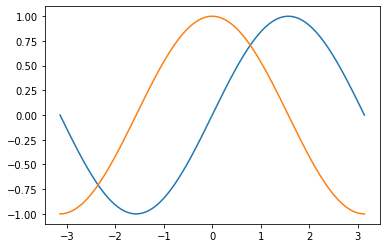

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Pi from numpy
pi = torch.from_numpy(np.array(np.pi))
x = torch.linspace(-pi, pi, 200, dtype=torch.float64, requires_grad=True)
# Compute the sine of x
y = torch.sin(x)
# Compute the cosine of x (gradient of y)
y.sum().backward()
z = x.grad

# Now, do some plotting
x, y, z = x.detach().numpy(), y.detach().numpy(), z.detach().numpy()
plt.plot(x, y)
plt.plot(x, z)
plt.show()